### Sesion PCA


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


In [8]:
df_titanic3 = pd.read_csv('titanic_dataset.csv')

In [9]:
df_titanic3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#Seleccionar características relevantes

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
df_titanic3 = df_titanic3[features]
df_titanic3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [15]:
#convertir la columna Sex en una variable numerica

df_titanic3['Sex'] = df_titanic3['Sex'].map({'male': 0, 'female': 1})


In [14]:
#obervamos los valores faltantes
print(df_titanic3.isnull().sum())

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64


In [17]:
# Imputamos los valores faltantes en Age con la media usando sklearn

imputer = SimpleImputer(strategy='mean')
df_titanic3['Age'] = imputer.fit_transform(df_titanic3[['Age']])

df_titanic3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


#### Estandarizacion de los datos

In [18]:
df_titanic3.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [19]:
# Separar caracteristicas y variables objetivos

x = df_titanic3.drop('Survived', axis=1)
y = df_titanic3['Survived']

In [21]:
x.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250


In [23]:
# Estandarizar las caracteristicas numericas

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [30]:
x_scaled

array([[ 0.82737724, -0.73769513, -0.5924806 ,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.56610693,  1.35557354,  0.63878901,  0.43279337, -0.47367361,
         0.78684529],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 0.82737724,  1.35557354,  0.        ,  0.43279337,  2.00893337,
        -0.17626324],
       [-1.56610693, -0.73769513, -0.2846632 , -0.4745452 , -0.47367361,
        -0.04438104],
       [ 0.82737724, -0.73769513,  0.17706291, -0.4745452 , -0.47367361,
        -0.49237783]], shape=(891, 6))

In [32]:
#conocer el tipo de dato de x_scaled
type(x_scaled)

numpy.ndarray

In [36]:
# Crear DataFrame estandarizado

x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
print(x_scaled_df.describe().round(2))

       Pclass     Sex     Age   SibSp   Parch    Fare
count  891.00  891.00  891.00  891.00  891.00  891.00
mean    -0.00    0.00    0.00    0.00    0.00    0.00
std      1.00    1.00    1.00    1.00    1.00    1.00
min     -1.57   -0.74   -2.25   -0.47   -0.47   -0.65
25%     -0.37   -0.74   -0.59   -0.47   -0.47   -0.49
50%      0.83   -0.74    0.00   -0.47   -0.47   -0.36
75%      0.83    1.36    0.41    0.43   -0.47   -0.02
max      0.83    1.36    3.87    6.78    6.97    9.67


#### Analisis de componentes principales

In [37]:
# Aplicar PCA sin reduccion de dimensionalidad

pca = PCA()
pca.fit(x_scaled_df)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [46]:
# Calcular la varianza explicada por cada componente

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
explained_variance


array([0.29943703, 0.27978007, 0.1457287 , 0.11982629, 0.09303687,
       0.06219103])

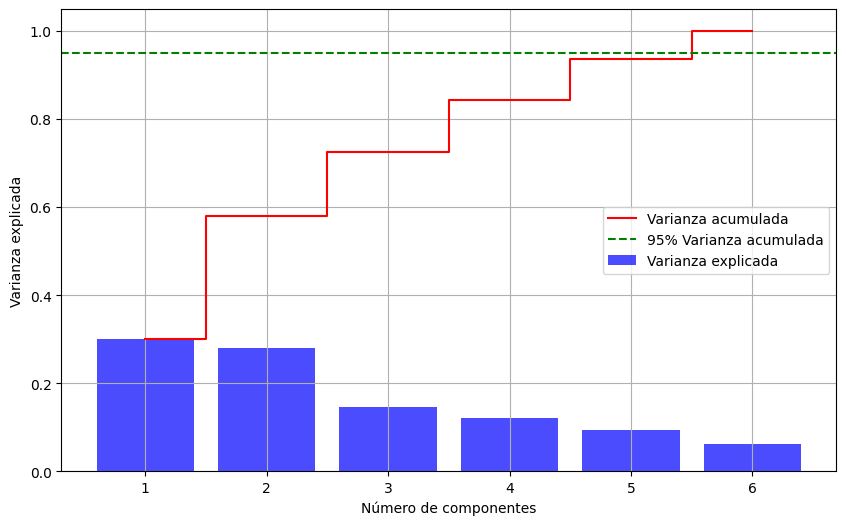

Varianza explicada acumulada por 2 componentes: 72.49%


In [47]:
# Visualizar la varianza explicada acumulada por cada componente

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue', label='Varianza explicada')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Varianza acumulada')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Varianza acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.legend()
plt.grid(True)
plt.show()

print(f"Varianza explicada acumulada por 2 componentes: {sum(explained_variance[:3]):.2%}")

#### Proyeccion en 2 o mas componentes

In [53]:
# Aplicar PCA para reducir la dimensionalidad a 2 componentes

pca_2d = PCA(n_components=2)
x_pca_2d = pca_2d.fit_transform(x_scaled_df)


In [55]:
# Crear DF con los resultados de PCA

pca_df = pd.DataFrame(data=x_pca_2d, columns=['PC1', 'PC2'])
pca_df




,PC1,PC2
0,-0.926296,0.895259
1,1.497933,-1.339850
2,-0.449617,0.505489
3,1.302467,-1.103392
4,-1.310593,-0.038177
...,...,...
886,-0.771675,-0.391841
887,0.737753,-0.658127
888,1.253125,1.490482
889,-0.118524,-1.115808


In [58]:
pca_df['Survived'] = y.reset_index(drop=True)


print(pd.DataFrame(pca_2d.components_, columns=x.columns, index=['PC1', 'PC2']))

       Pclass       Sex       Age     SibSp     Parch      Fare
PC1 -0.383365  0.398852 -0.039675  0.389721  0.477610  0.558910
PC2  0.555720  0.076123 -0.553824  0.412865  0.346717 -0.296629
